QuantumHelpers is a library intended to help with learning and understanding quantum computing, or can be used for quick calculations.

In [1]:
import src.QuantumHelpers as qh
import numpy as np

In [2]:
# Use the eval function to read in a wavefunction as a string

# This bell state is being created by addin the |00> and |11>
# and normalizing by a factor of 1/sqrt(2)
bell_state = qh.eval("(1/Sr(2))(|00> + |11>)")
print(bell_state)

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [3]:
# The same bell state can be created by starting with the |00> state,
# applying a Hadamard to the first qubit, and then a Cnot across the two qubtis

# Gates are applied right to left, as if they are a function call
# The HI is a kronecker product of a Hadamard gate and Identity.
# This creates a 2-qubit gate where the
# Hadamard is applied to the first qubit, and Identity to the second.
same_bell_state = qh.eval("Cnot * HI|00>")
print(same_bell_state)

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [4]:
# This same state can be made again by applying
# a Hadamard to a single |0> state, then kronecker
# multiplying to another single qubit |0> state
# and then applying the Cnot across both qubits.
# Make sure to use parenthesis to define order of operations
same_bell_state_again = qh.eval("Cnot * (H|0>)|0>")
print(same_bell_state_again)

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [5]:
# The eval function will also return an object that can be multiplied together.
zeroKet = qh.eval("|0>")
hadamard = qh.eval("H")
cNot = qh.eval("Cnot")
print(cNot * ((hadamard * zeroKet) * zeroKet))

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [6]:
# When one matrix is applied to another matrix, they can be matrix multiplied,
# or kronecker multiplied. To specify in a eval string,
# an explicit * is matrix multiplication,
# and two matricies next to each other is assumed to be a kronecker product.
print(qh.eval("XZ")) # Make a 2 qubit gate with X1 Z2
print("----------------")
print(qh.eval("X * Z")) # Apply Z and then X to the same qubit

[[0 0 1 0]
 [0 0 0 -1]
 [1 0 0 0]
 [0 -1 0 0]]
----------------
[[0 -1]
 [1 0]]


In [7]:
# Both types of multiplication can also be specified while using objects.
X = qh.eval("X")
Z = qh.eval("Z")
print(X & Z) # & is for kron
print("----------------")
print(X * Z) # * is for matrix multiply

[[0 0 1 0]
 [0 0 0 -1]
 [1 0 0 0]
 [0 -1 0 0]]
----------------
[[0 -1]
 [1 0]]


In [8]:
# Matricies, Bras, and Kets are kept track of and handled
# appropriately when evaluated.
# This allows for projectors and expectation values to be created easily.
zero_projector = qh.eval("|0><0|")
print(zero_projector)
print("--------------")
zero_state_expectation = qh.eval("<0||0>")
 # The vertical bar must be included for the ket and bra... just because of how it is tokenized
print(zero_state_expectation)

[[1 0]
 [0 0]]
--------------
1


In [9]:
# This can also be done with objects, and can take advantage of the dagger method
# Dagger is a hermetian conjugate (transpose and complex conjugate), which makes a ket a bra
zeroKet = qh.eval("|0>")
print(zeroKet * zeroKet.dagger())
print("--------------")
print(zeroKet.dagger() * zeroKet)

[[1 0]
 [0 0]]
--------------
1


In [10]:
# The eval function uses a class called QuantumElement, which simply stores data and type.
# It is easy to get the data of the object as a numpy array by accessing the data attribute.

# This can be helpful, because all of numpy functions are still available to use on QuantumElements,
# just pass the data of the object into the numpy function!
example_data = qh.eval("H|0>")
print(example_data)
print("-------------")
print(example_data.data)

[[1/√2]
 [1/√2]]
-------------
[0.70710678 0.70710678]


In [11]:
# Rotation gates and matrix exponentiation is also supported by the eval function.
hadamard_by_rotation_gates = qh.eval("-1jRz(Pi)*Ry(3π/2)") 
# Pi can be used as the unicode symbol or by using "Pi"
print(hadamard_by_rotation_gates)

[[1/√2 1/√2]
 [1/√2 -1/√2]]


In [12]:
# Exponentiated gates can be build with the Exp
rotated_in_x = qh.eval("Rx(Pi/2)|0>")
print(rotated_in_x)
print("-------------")
rotated_in_x_again = qh.eval("Exp(-1j * (Pi/4) * X)|0>")
print(rotated_in_x_again)
print("-------------")
# Or can built by calling exponentiate matrix
h = qh.eval("-1j * (Pi/4) * X")
# Custom quantum elements can be created by calling the contructor. It needs data and a type
exponentiated_h = qh.WaveFunctionElement(qh.exponentiate_matrix(h.data), qh.WaveFunctionTokens.OPERATOR)
print(exponentiated_h * qh.eval("|0>"))

[[1/√2]
 [0-1/√2j]]
-------------
[[1/√2]
 [0-1/√2j]]
-------------
[[1/√2]
 [0-1/√2j]]


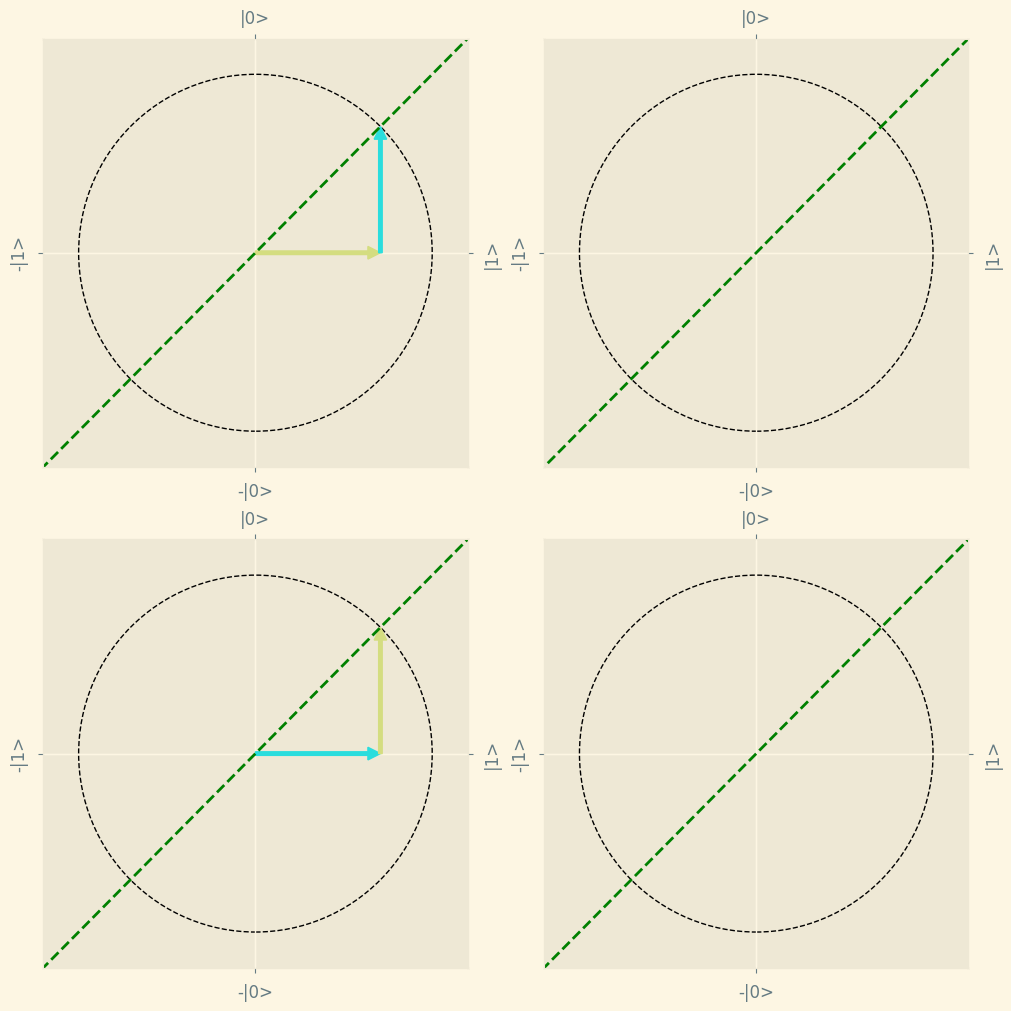

In [23]:
# A single qubit ket object can also be drawn.
zeroKet = qh.eval("(1/Sr(2)) * (|01> + |10>)")
zeroKet.draw()
# The plot on the left is the real value, and the right is the imaginary
# The green dotted line is the x-axis

In [14]:
print(zeroKet)

[[0]
 [1/√2]
 [1/√2]
 [0]]


In [15]:
zeroState = qh.eval("|0><0|")
OneState = qh.eval("|1><1|")


In [16]:
a = qh.eval("|10>")
cnot = qh.eval("(|0><0|)X + (|1><1|)I")
b = cnot * a
a.print()
b.print()

1 |10>
1 |10>


In [17]:
# Here is a more complicated example of finding the ground state energy of the Heisenberg model with 8 qubits.

full_hp = qh.WaveFunctionElement(np.zeros((2**8, 2**8)), qh.WaveFunctionTokens.OPERATOR)
xs = ['XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX']
ys = ['YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY']
zs = ['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ']
for i in range(7):
    full_hp += qh.eval(xs[i]) + qh.eval(ys[i]) + qh.eval(zs[i])

eigs, eigVecs = np.linalg.eig(full_hp.data)
print(np.min(eigs))

gs_psi = qh.WaveFunctionElement(np.transpose(eigVecs)[np.argmin(eigs)], qh.WaveFunctionTokens.OPERATOR)



(-13.499730394751628+1.972152264454809e-31j)


In [18]:
def Hp(a, dt):
    theta = -2 * dt * a
    print(f"iswap with {theta}")
    hpIswap = p_iSwap(theta)
    hprzz = rzz(theta)
    I = qh.eval("I")
    evens = (hpIswap & hpIswap & hpIswap & hpIswap) * (hprzz & hprzz & hprzz & hprzz)
    odds = (I & hpIswap & hpIswap & hpIswap & I) * (I & hprzz & hprzz & hprzz & I)
    return evens * odds

def Hd(b, dt):
    theta = b * dt * 2
    print(f"Hd with {theta}")
    return qh.eval(f"(Rz({theta:.20f}))(Rz(-1 * {theta:.20f}))" * 4)
    #return qh.eval(f"(Rx({theta}))" * 8)

def rzz(theta):
    return qh.eval(f"Exp((-1j * {theta:.20f} / 2) * (ZZ))")

def p_iSwap(theta):
    arr = np.array([[1, 0, 0, 0],
                    [0, np.cos(theta/2), -1j * np.sin(theta/2), 0],
                    [0, -1j * np.sin(theta/2), np.cos(theta/2), 0],
                    [0, 0, 0, 1]])
    return qh.WaveFunctionElement(arr, qh.WaveFunctionTokens.OPERATOR)

In [19]:
T = 1
dt = 1 / 4

psi = qh.eval("|01010101>")
t = 0
while t < T:
    a = (t + dt) / T
    if a == 1:
        a = dt/2
    b = 1 - a
    psi = Hp(a, dt) * psi
    psi = Hd(b, dt) * psi
    t += dt


iswap with -0.125
Hd with 0.375
iswap with -0.25
Hd with 0.25
iswap with -0.375
Hd with 0.125
iswap with -0.0625
Hd with 0.4375


In [20]:
yHad = qh.WaveFunctionElement( (1/np.sqrt(2)) * np.array([[1j, -1], [1, -1j]]), qh.WaveFunctionTokens.OPERATOR)

expectStrings = ['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ']
xPsi = qh.eval("HHHHHHHH") * psi
gsXPsi = qh.eval("HHHHHHHH") * gs_psi
yPsi = (yHad & yHad & yHad & yHad & yHad & yHad & yHad & yHad) * psi
gsYPsi = (yHad & yHad & yHad & yHad & yHad & yHad & yHad & yHad) * gs_psi
zEnergy = 0
xEnergy = 0
yEnergy = 0
gsZEnergy = 0
gsXEnergy = 0
gsYEnergy = 0
for state in expectStrings:
    op = qh.eval(state)
    zEnergy += (psi.dagger() * op * psi).data
    xEnergy += (xPsi.dagger() * op * xPsi).data
    yEnergy += (yPsi.dagger() * op * yPsi).data
    gsZEnergy += (gs_psi.dagger() * op * gs_psi).data    
    gsXEnergy += (gsXPsi.dagger() * op * gsXPsi).data    
    gsYEnergy += (gsYPsi.dagger() * op * gsYPsi).data    
print(zEnergy)
print(xEnergy)
print(yEnergy)
print(zEnergy + xEnergy + yEnergy)

print(f"GS {gsZEnergy + gsYEnergy + gsXEnergy}")

(-5.5193870916865135+0j)
(-2.6081045974369372+0j)
(-2.6081045974369372+0j)
(-10.735596286560387+0j)
GS (-13.499730394751545+0j)
